In [ ]:
import pandas as pd

# 讀取 CSV 檔案
data = pd.read_csv('diet_data.csv')

# 假設 ID 欄位名稱是 'ID'，如果不是請改為正確的名稱
df = pd.DataFrame(data)

# 計算每個受試者食用了多少種類的食物
df['food_type_count'] = (df.iloc[:, 1:] > 0).sum(axis=1)

# 提取 ID 和 food_type_count 欄位
food_count_df = df[['ID', 'food_type_count']]

# 顯示結果
print(food_count_df)


            ID  food_type_count
0      1000054                6
1      1000142                3
2      1000208                5
3      1000259                5
4      1000267                7
...        ...              ...
56276  6022220                2
56277  6022316               11
56278  6022344                5
56279  6022417                9
56280  6022425                1

[56281 rows x 2 columns]


In [7]:
# 找出 food_type_count 為 0 的受試者
zero_food_count_df = df[df['food_type_count'] == 0]

# 顯示這些受試者的資料
print(zero_food_count_df)


            ID  Stewed  Prune  Dried  Mixed  Apple  Banana  Berry  Cherry  \
13     1001113     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   
16     1001457     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   
35     1003033     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   
43     1003432     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   
47     1003666     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   
...        ...     ...    ...    ...    ...    ...     ...    ...     ...   
56234  6018109     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   
56237  6018267     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   
56252  6020087     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   
56256  6020514     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   
56271  6021731     NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN   

       Grapefruit  ...  Sweetpepper  Spinach  Sprouts  Sweetcorn  Freshtoma

In [11]:
# 過濾出食用了至少一種食物的受試者
# 這裡過濾掉 food_type_count 為 0 的受試者
non_zero_food_df = df[df['food_type_count'] > 0]
df = non_zero_food_df[['ID', 'food_type_count']]

# 顯示食用了至少一種食物的受試者 ID 和食物種類數量
print(df)


            ID  food_type_count
0      1000054                6
1      1000142                3
2      1000208                5
3      1000259                5
4      1000267                7
...        ...              ...
56276  6022220                2
56277  6022316               11
56278  6022344                5
56279  6022417                9
56280  6022425                1

[53276 rows x 2 columns]


In [60]:
import pandas as pd

data = pd.read_csv('diet_data.csv')

df = pd.DataFrame(data)

# 計算每個受試者食用了多少種類的食物
df['food_type_count'] = (df.iloc[:, 1:] > 0).sum(axis=1)

# 過濾出食用了超過 n 種食物的受試者
n = 10
food_type_gt_four_df = df[df['food_type_count'] > n]

print(food_type_gt_four_df)


            ID  Stewed  Prune  Dried  Mixed  Apple  Banana  Berry  Cherry  \
54     1004663     NaN    NaN    NaN    NaN    2.0     2.0    NaN     NaN   
73     1006362     NaN    NaN    NaN    NaN    NaN     NaN    1.0     NaN   
82     1007436     1.0    NaN    NaN    NaN    1.0     1.0    NaN     NaN   
85     1007956     NaN    NaN    NaN    1.0    NaN     1.0    1.0     NaN   
101    1009513     1.0    NaN    0.5    NaN    2.0     1.0    NaN     NaN   
...        ...     ...    ...    ...    ...    ...     ...    ...     ...   
56224  6017204     NaN    NaN    NaN    NaN    NaN     1.0    0.5     NaN   
56239  6018461     NaN    NaN    NaN    NaN    2.0     1.0    NaN     NaN   
56250  6019379     NaN    NaN    0.5    NaN    1.0     1.0    0.5     0.5   
56260  6020913     NaN    0.5    0.5    NaN    1.0     1.0    0.5     NaN   
56277  6022316     NaN    NaN    NaN    NaN    0.5     NaN    1.0     NaN   

       Grapefruit  ...  Sweetpepper  Spinach  Sprouts  Sweetcorn  Freshtoma

In [61]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data_withou_id = food_type_gt_four_df.drop('ID', axis=1)
data = data_withou_id.drop('food_type_count', axis=1)
data = data.fillna(0)

numeric_columns = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_columns]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_columns)

/usr2/kevin/anaconda3/envs/diet_data_clustering_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


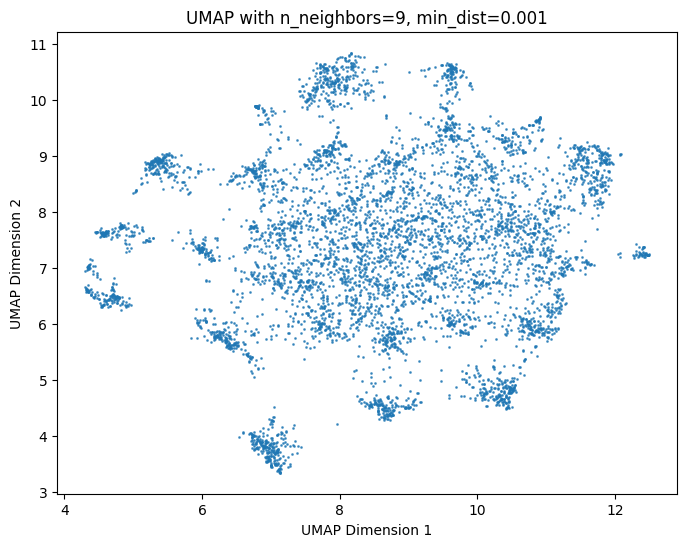

In [76]:
import umap
import matplotlib.pyplot as plt

n_neighbors = 9
min_dist = 0.001

umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    random_state=42,
    # verbose=True
)

umap_result = umap_model.fit_transform(data_scaled_df)

plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.7, s=1)
plt.title(f'UMAP with n_neighbors={n_neighbors}, min_dist={min_dist}')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

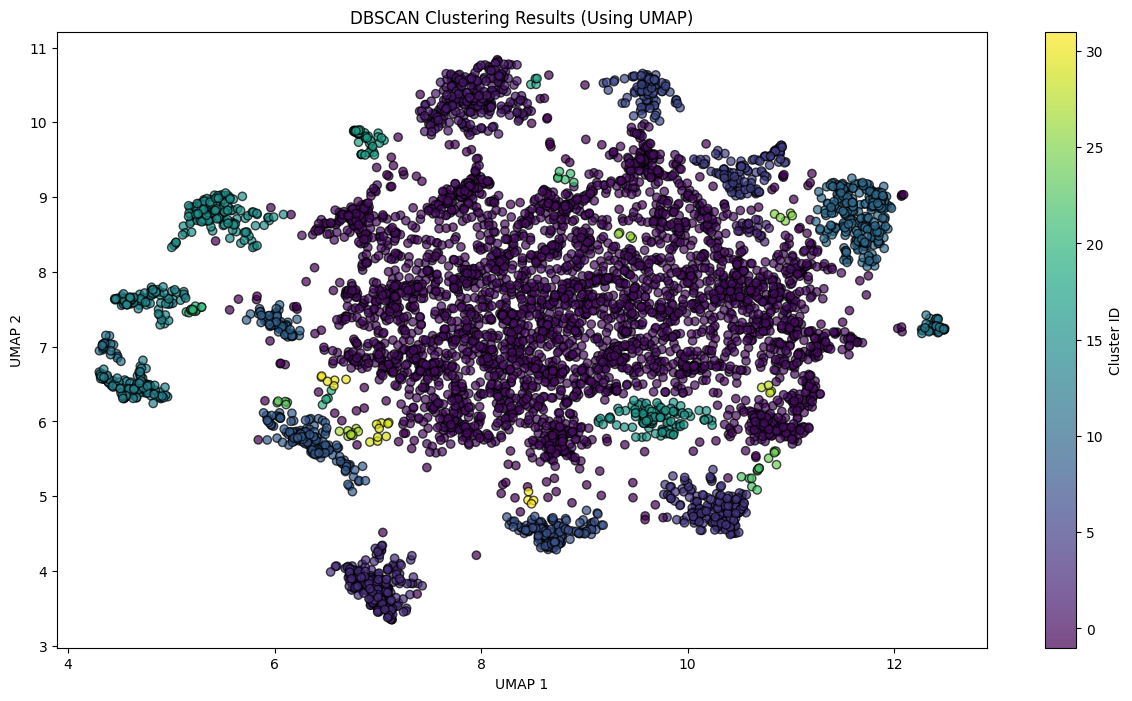

In [78]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.12, min_samples=4)
dbscan_labels = dbscan_model.fit_predict(umap_result)


plt.figure(figsize=(15, 8))
# 使用聚類結果 (dbscan_labels) 來決定顏色，-1 代表噪聲點
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('DBSCAN Clustering Results (Using UMAP)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster ID')
plt.show()

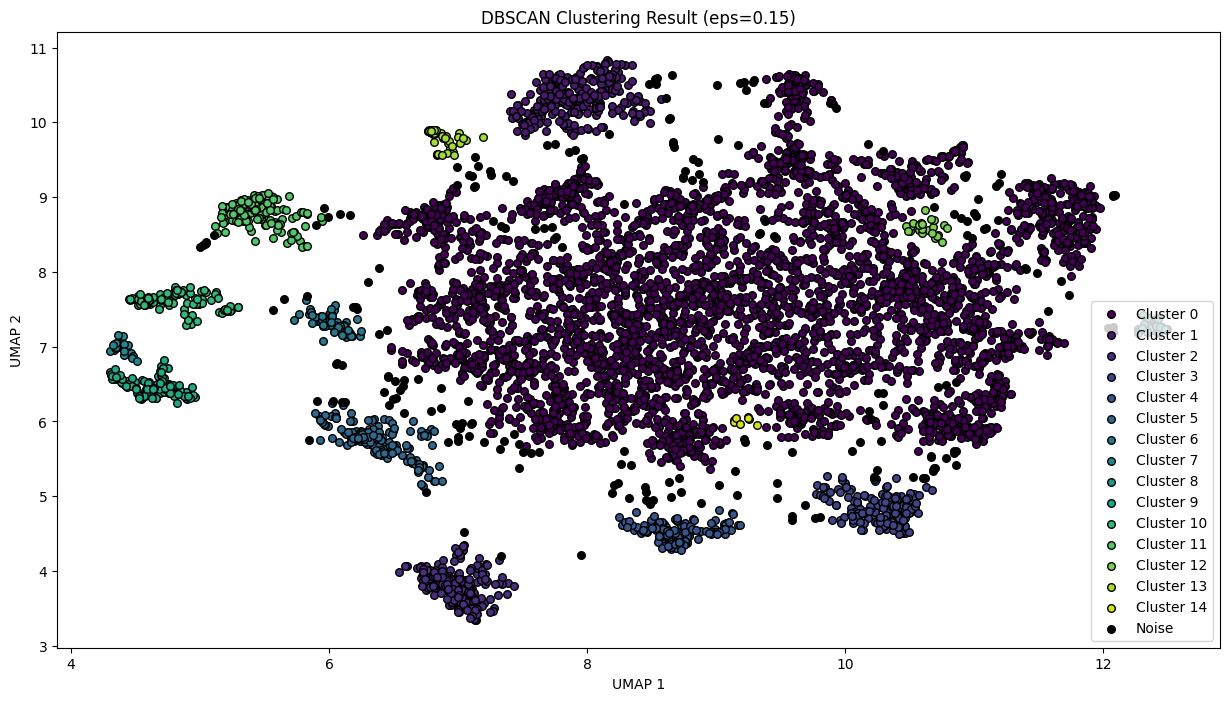

In [84]:
from sklearn.cluster import DBSCAN

# 使用 DBSCAN 聚類
eps=0.15
dbscan_model = DBSCAN(eps=eps, min_samples=9)
labels = dbscan_model.fit_predict(umap_result)


plt.figure(figsize=(15, 8))

# 獲取唯一的標籤 (聚類結果)
unique_labels = set(labels)

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# 繪製每個聚類點
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)  # 找出屬於該聚類的點
    
    if k == -1:
        col = 'black'
        label_name = 'Noise'
    else:
        label_name = f'Cluster {k}'

    xy = umap_result[class_member_mask]  # 選擇屬於該聚類的點
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=label_name, edgecolors='k', s=30)

# 標題、軸標籤與圖例
plt.title(f'DBSCAN Clustering Result (eps={eps})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

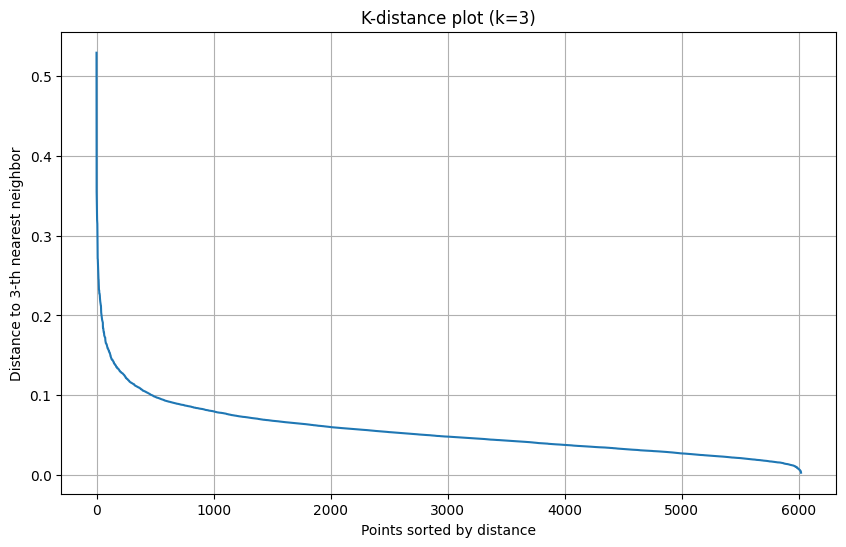

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def select_MinPts(data, k):
    # 使用 NearestNeighbors 計算 k 最近鄰
    neigh = NearestNeighbors(n_neighbors=k+1)  # k+1 因為包含點自身
    neigh.fit(data)
    
    # 計算距離
    distances, indices = neigh.kneighbors(umap_result)
    
    # 獲取第k個最近鄰的距離（最後一列）
    k_dist = distances[:, -1]
    
    return np.sort(k_dist)[::-1]  # 從大到小排序

# 設定參數
k = 3  # 2 * 維度 - 1，這裡假設是2維數據

# 計算並繪製 k-distance 圖
k_dist = select_MinPts(umap_result, k)

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(k_dist)), k_dist)
plt.title(f'K-distance plot (k={k})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}-th nearest neighbor')
plt.grid(True)
plt.show()

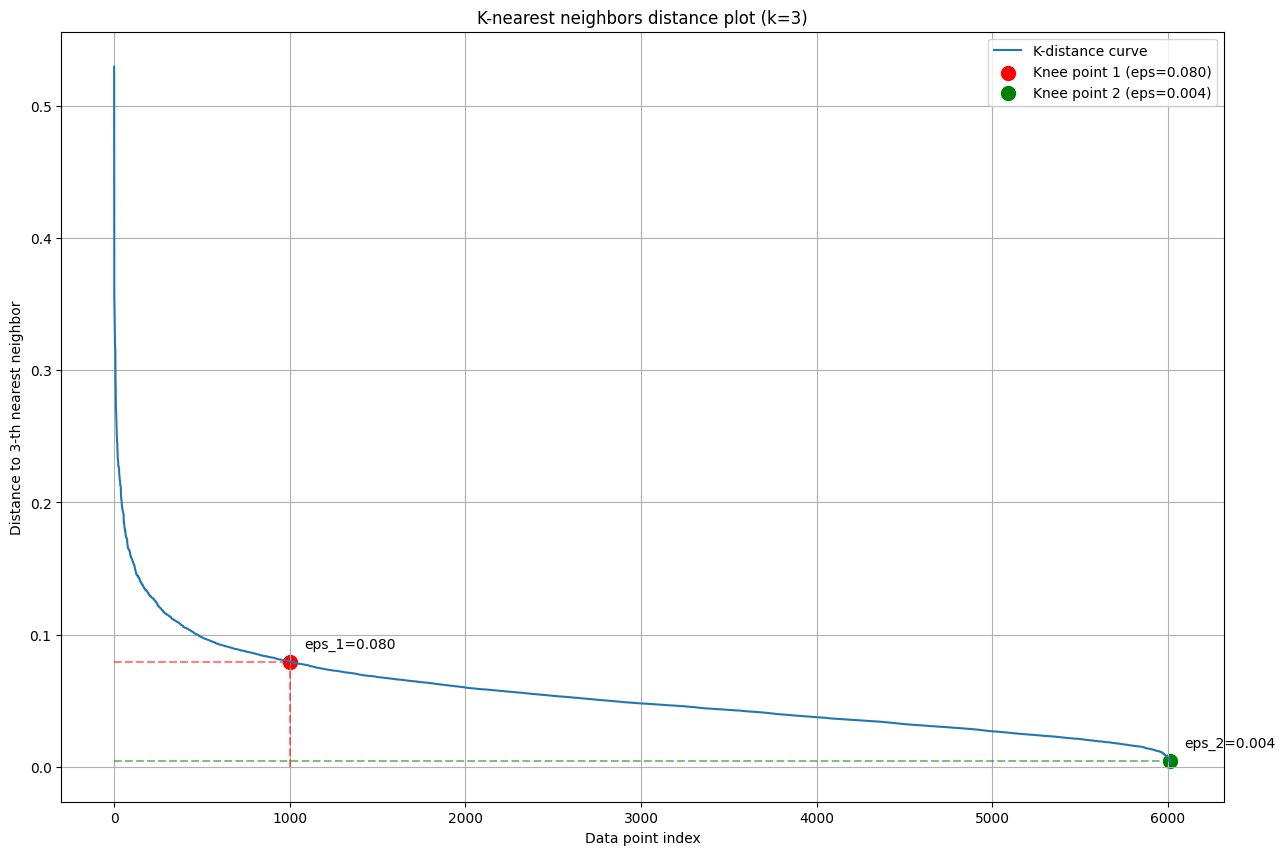

檢測到的 eps 值：
eps_1: 0.080
eps_2: 0.004


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

def select_MinPts(data, k):
    neigh = NearestNeighbors(n_neighbors=k+1)
    neigh.fit(data)
    distances, indices = neigh.kneighbors(data)
    k_dist = distances[:, -1]
    return np.sort(k_dist)[::-1]

def plot_kdistance_multiple_knees(data, k, sensitivity=1.0, n_curves=2):
    # 計算 k-distance
    k_dist = select_MinPts(data, k)
    x = np.arange(len(k_dist))
    
    # 方法2: 分段檢測
    segment_size = len(x) // n_curves
    knee_points = []
    eps_values = []
    
    for i in range(n_curves):
        start_idx = i * segment_size
        end_idx = (i + 1) * segment_size if i < n_curves - 1 else len(x)
        
        # 確保我們只使用當前段的x值，從0開始
        segment_x = np.arange(end_idx - start_idx)
        segment_y = k_dist[start_idx:end_idx]
        
        segment_kneedle = KneeLocator(
            segment_x, 
            segment_y,
            curve='convex',
            direction='decreasing',
            online=True,
            S=sensitivity
        )
        
        if segment_kneedle.knee is not None:
            # 將局部索引轉換回全局索引
            knee_point = segment_kneedle.knee + start_idx
            # 確保索引不會超出範圍
            if knee_point < len(k_dist):
                knee_points.append(knee_point)
                eps_values.append(k_dist[knee_point])
    
    # 繪圖
    plt.figure(figsize=(15, 10))
    
    # 畫出主要的 k-distance 曲線
    plt.plot(x, k_dist, label='K-distance curve')
    
    # 標記所有找到的拐點
    colors = ['r', 'g', 'b', 'purple']  # 不同拐點使用不同顏色
    for i, (knee, eps) in enumerate(zip(knee_points, eps_values)):
        color = colors[i % len(colors)]
        plt.scatter(knee, eps, color=color, s=100, 
                   label=f'Knee point {i+1} (eps={eps:.3f})')
        plt.plot([0, knee], [eps, eps], linestyle="--", 
                color=color, alpha=0.5)
        plt.plot([knee, knee], [0, eps], linestyle="--", 
                color=color, alpha=0.5)
    
    # 添加標籤和標題
    plt.title(f'K-nearest neighbors distance plot (k={k})')
    plt.xlabel('Data point index')
    plt.ylabel(f'Distance to {k}-th nearest neighbor')
    plt.grid(True)
    plt.legend()
    
    # 添加文字說明
    for i, (knee, eps) in enumerate(zip(knee_points, eps_values)):
        plt.annotate(f'eps_{i+1}={eps:.3f}', 
                    xy=(knee, eps), 
                    xytext=(10, 10),
                    textcoords='offset points')
    
    plt.show()
    
    return eps_values

# 使用示例
eps_values = plot_kdistance_multiple_knees(
    umap_result, 
    k=3, 
    sensitivity=1.0, 
    n_curves=2
)

print("檢測到的 eps 值：")
for i, eps in enumerate(eps_values):
    print(f"eps_{i+1}: {eps:.3f}")